<a href="https://colab.research.google.com/github/tusharpoddar/e-Science-Research/blob/master/GoogleDrive/Netcdf_to_numpy(no_rand).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The following class is used to prepare a numpy file that can be used for the training later.

## The following notebook does the following things - 
1. The notebook asks the user the specify the dataset as a CSV file that needs to be converted into a numpy array that can be used by the VGGish model. 

2. The notebook opens the specified CSv file with the help of pandas. 

3. The notebook then gives an example of how to open the netcdf files that the CSV file specify in the form of animal number, experiment number, etc. 

4. The notebook then gives you an option to store all the data for the NetCDF file to a numpy array that can be easily handled. 

# Conclusion - 
The notebook can be used for variuos things - 
1. The following data is an initial step towards generating the data that can be used by the VGGish model. 

2. If you want to see the proper notebook that generates the data for the VGGish model head over to see Netcdf-to-numpy(rand).ipynb 


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
pip install netcdf4

     |████████████████████████████████| 4.3MB 7.6MB/s 
     |████████████████████████████████| 296kB 43.7MB/s 


The following code is written to read the csv files from the drive and see the spectrograms from the netcdf file. 

In [ ]:
cd /content/gdrive/Shared drives/USV_eScience_Incubator

/content/gdrive/Shared drives/USV_eScience_Incubator


In [ ]:
import pandas as pd

In [ ]:
path = '/content/gdrive/Shared drives/USV_eScience_Incubator/Data/annotation_data_frames/annot_df_CPApost_round2.csv'

In [ ]:
annot = pd.read_csv(path)

In [ ]:
annot = pd.DataFrame(data = annot)
print(annot)
print(annot.Annotation.value_counts())

    Unnamed: 0  Annotation  High Freq (Hz)  ...     exp  session time_stamp
0            0         bbc         61181.4  ...  round2  CPApost   370080.0
1            1         bbc         51532.8  ...  round2  CPApost   548797.5
2            0         low         27406.4  ...  round2  CPApost   178245.0
3            1   low multi         61831.6  ...  round2  CPApost   262192.5
4            2   low multi         62500.0  ...  round2  CPApost   262305.0
..         ...         ...             ...  ...     ...      ...        ...
76           2         bbc         26554.4  ...  round2  CPApost    20407.5
77           3  high multi        121923.6  ...  round2  CPApost   167175.0
78           4         bbc         42098.4  ...  round2  CPApost   236475.0
79           5         low         18296.6  ...  round2  CPApost   310612.5
80           6         NaN         26716.3  ...  round2  CPApost   590625.0

[81 rows x 7 columns]
bbc             32
low             23
low multi       10
full mul

In [ ]:
import numpy as np

In [ ]:
annot_np = np.array(annot)

In [ ]:
annot_np.shape

(81, 7)

In [ ]:
print(annot_np)

[[0 'bbc' 61181.4 625 'round2' 'CPApost' 370080.0]
 [1 'bbc' 51532.8 625 'round2' 'CPApost' 548797.5]
 [0 'low' 27406.4 624 'round2' 'CPApost' 178245.0]
 [1 'low multi' 61831.6 624 'round2' 'CPApost' 262192.5]
 [2 'low multi' 62500.0 624 'round2' 'CPApost' 262305.0]
 [3 'low multi' 37767.4 624 'round2' 'CPApost' 262125.0]
 [4 'low' 25401.1 624 'round2' 'CPApost' 266400.0]
 [5 'low' 25849.9 624 'round2' 'CPApost' 307800.0]
 [6 'low' 19802.0 624 'round2' 'CPApost' 266490.0]
 [0 'bbc' 51315.8 623 'round2' 'CPApost' 26865.0]
 [1 'low' 34429.8 623 'round2' 'CPApost' 79335.0]
 [0 'bbc' 101096.5 622 'round2' 'CPApost' 67095.0]
 [1 'bbc' 100219.3 622 'round2' 'CPApost' 67702.5]
 [2 'bbc' 114473.7 622 'round2' 'CPApost' 67972.5]
 [3 'full multi' 104824.6 622 'round2' 'CPApost' 91912.5]
 [4 'full multi' 111184.2 622 'round2' 'CPApost' 92047.5]
 [5 'full multi' 105043.9 622 'round2' 'CPApost' 92137.5]
 [6 'full multi' 108552.6 622 'round2' 'CPApost' 95040.0]
 [7 'full multi' 108114.0 622 'round2'

In [ ]:
import xarray as xr

In [ ]:
import cv2

In [ ]:
dataWork = []

In [ ]:
# reading all the netcdf files that are important to produce the spectrrogram in numpy
for record in annot_np:
  path = '/content/gdrive/Shared drives/USV_eScience_Incubator/Data/netcdf_files/CPA/' + str(record[3]) +'_CPApost_xr_Dataset.nc'
  data = xr.open_dataset(path)
  time = record[6]
  print(time)
  xr_slice = data['__xarray_dataarray_variable__'].sel(slices=time)
  temp = np.array(xr_slice)
  changed = cv2.resize(temp, (64, 96))
  dataWork.append(changed)

370080.0
548797.5
178245.0
262192.5
262305.0
262125.0
266400.0
307800.0
266490.0
26865.0
79335.0
67095.0
67702.5
67972.5
91912.5
92047.5
92137.5
95040.0
95130.0
99742.5
100417.5
136057.5
136102.5
136170.0
137407.5
233865.0
233887.5
234180.0
277785.0
585000.0
11362.5
113062.5
113377.5
113850.0
138465.0
156622.5
157207.5
157297.5
410242.5
488407.5
550710.0
551542.5
551430.0
551452.5
551475.0
565740.0
157140.0
157252.5
21442.5
238545.0
238657.5
557910.0
561757.5
21780.0
33502.5
193792.5
509130.0
580095.0
240277.5
160672.5
183712.5
185760.0
476122.5
476865.0
541417.5
69120.0
120757.5
193702.5
548055.0
581782.5
581985.0
582142.5
582480.0
510367.5
53392.5
53257.5
20407.5
167175.0
236475.0
310612.5
590625.0


In [ ]:
final = np.array(dataWork)
print(final.shape)

(81, 96, 64)


In [ ]:
cd ..

/content/gdrive/Shared drives


In [ ]:
cd Research/

/content/gdrive/Shared drives/Research


In [ ]:
# saving it into a numpy file so that we donnt have to calculate them again and again
np.save('annot_df_CPApost_round2_data.npy', final)

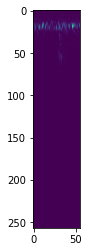

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(final[80, :,:])

In [ ]:
# code to calculate the numpy array that is for the time that represent the noise 
# reading all the netcdf files that are important to produce the spectrogram in numpy format. 
for record in annot_np:
  path = '/content/gdrive/Shared drives/USV_eScience_Incubator/Data/netcdf_files/CPA/' + str(record[3]) +'_CPApost_xr_Dataset.nc'
  data = xr.open_dataset(path)
  num = np.array(data.to_array())
  final = num[0, :, :, :]
  print(num.shape)

In [ ]:
path = '/content/gdrive/Shared drives/Research/Data/Numpy files/annot_df_CPApost_round2/annot_df_CPApost_round2_data.npy'

In [ ]:
data_loaded = np.load(path)